# Analysis with convolution 

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt  # To visualize


df = pd.read_excel("pohlim-2.xlsx")
lock_gate = df["שער נעילה (באגורות)"]


# Normalized

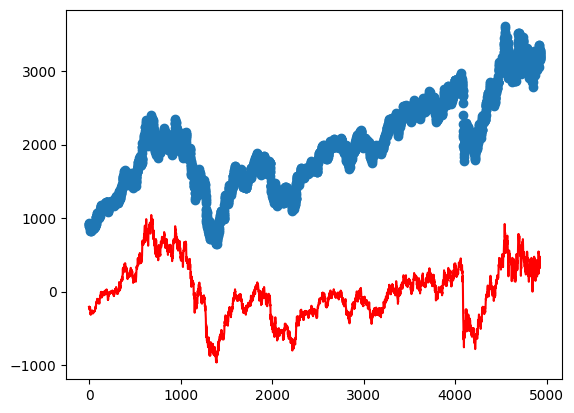

In [2]:
X = df.iloc[:, 14].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df.iloc[:, 1].values.reshape(-1, 1)

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

b = linear_regressor.intercept_
a = linear_regressor.coef_

Y_normalized = lock_gate - (lock_gate.index * a.item() + b.item())

plt.scatter(X, Y)
plt.plot(X, Y_normalized, color="red")
plt.show()


# Yfinance 

In [3]:
import talib
import yfinance as yf

In [4]:
import yfinance as yf

# Define the ticker for the stock you want to get data for
ticker = "LUMI.TA"

# Download 3 months of historical data using the daily time frame
leumi = yf.download(ticker, period="3mo", interval="1d")
discount = yf.download("DSCT.TA", period="3mo", interval="1d")
bezeq = yf.download("BEZQ.TA", period="3mo", interval="1d")
cellcom = yf.download("CEL.TA", period="3mo", interval="1d")
elbit = yf.download("ESLT.TA", period="3mo", interval="1d")
nice = yf.download("NICE.TA", period="3mo", interval="1d")
teva = yf.download("TEVA.TA", period="3mo", interval="1d")
# Print the DataFrame to see the data


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Date
2023-06-14          NaN
2023-06-15          NaN
2023-06-18          NaN
2023-06-19          NaN
2023-06-20          NaN
                ...    
2023-09-10    17.513820
2023-09-11    39.418582
2023-09-12    64.934964
2023-09-13    82.211538
2023-09-14    79.517936
Length: 66, dtype: float64


<Axes: xlabel='Date'>

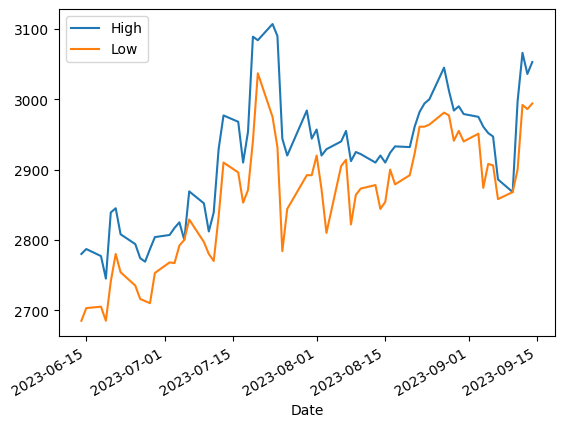

In [5]:
high = leumi["High"]
low = leumi["Low"]
close = leumi["Close"]

slowk, slowd = talib.STOCH(high, low, close)
print(slowk)
#slowd.plot()
#slowk.plot()
leumi["High"].plot(legend=True)
leumi["Low"].plot(legend=True)


In [108]:
leumi_data = yf.Ticker("LUMI.TA")
leumi_data = leumi_data.history(start='2022-01-01',end='2023-05-15')
leumi_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-02 00:00:00+02:00,3114.592954,3161.148903,3113.661835,3153.699951,1385463,0.0,0.0
2022-01-03 00:00:00+02:00,3147.182041,3164.873301,3137.870852,3158.355469,3931878,0.0,0.0
2022-01-04 00:00:00+02:00,3158.355109,3195.599863,3155.561753,3189.082031,3399070,0.0,0.0
2022-01-05 00:00:00+02:00,3181.633368,3197.462389,3157.424276,3183.495605,4805540,0.0,0.0
2022-01-06 00:00:00+02:00,3149.044226,3192.806815,3136.939679,3170.459961,5752449,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-08 00:00:00+03:00,2821.075058,2824.983717,2764.399494,2774.171143,3316512,0.0,0.0
2023-05-09 00:00:00+03:00,2752.673274,2765.376417,2727.266989,2759.513428,2275721,0.0,0.0
2023-05-10 00:00:00+03:00,2781.011016,2824.006267,2765.376379,2814.234619,3275942,0.0,0.0


<Axes: xlabel='Date'>

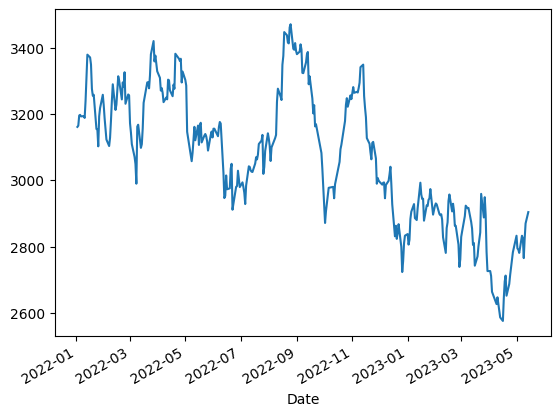

In [7]:
leumi_data["High"].plot()

[[-1.48476257]]


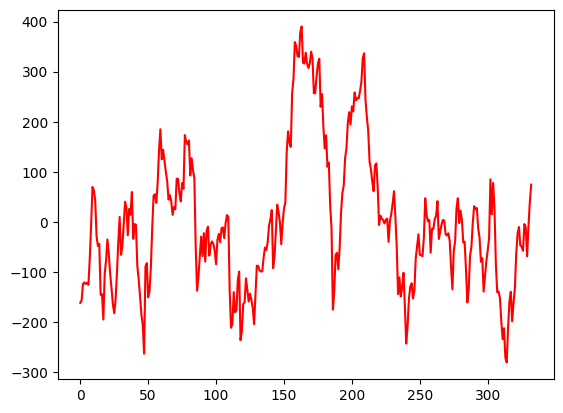

In [8]:
# from pandas import *
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt  # To visualize

leumi_data_high = leumi_data["High"]
leumi_indexes = pd.Series(range(leumi_data["High"].shape[0]))


X = leumi_indexes.values.reshape(-1, 1)  # values converts it into a numpy array
Y = leumi_data_high.values.reshape(-1, 1)


linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

b = linear_regressor.intercept_
a = linear_regressor.coef_


Y_normalized = Y - (X * a.item() + b.item())

#plt.scatter(X, Y)
plt.plot(X, Y_normalized, color="red")
print(a) # losing 1.48 agorot per day on average 
#plt.show()

In [9]:
leumi_data["High"].shape[0]

333

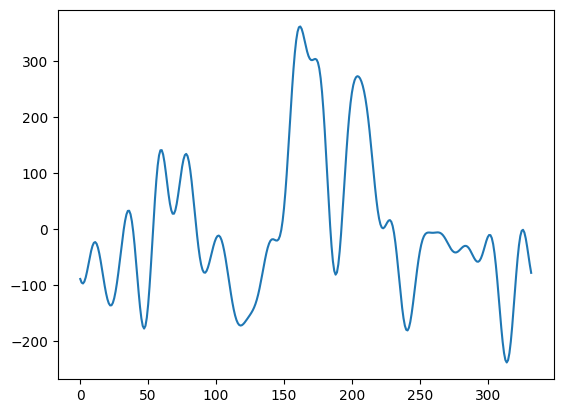

In [110]:
import scipy.fft
Y_normalized = Y_normalized.reshape(-1)
fft_Y_norm = np.fft.fft(Y_normalized)
#print(fft_Y_norm)
freq = fft_Y_norm.shape[0]//2 - 20
fft_Y_norm[fft_Y_norm.shape[0]//2-freq:fft_Y_norm.shape[0]//2+freq] = 0 + 0.j
fft_Y_norm = np.fft.ifft(fft_Y_norm)
plt.plot(fft_Y_norm)
#plt.plot(scipy.fft.ifft(fft_Y_norm))


# Getting the last big change

In [11]:
leumi_data = yf.Ticker("LUMI.TA")
leumi_data = leumi_data.history(start='2005-01-01',end='2023-05-15')
leumi_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-12-31 00:00:00+02:00,1319.710765,1326.771818,1307.000870,1320.416870,2175846,0.0,0.0
2008-01-01 00:00:00+02:00,1316.886205,1336.657151,1313.355679,1327.477783,2695461,0.0,0.0
2008-01-02 00:00:00+02:00,1326.065922,1362.783402,1315.474341,1343.012451,4339540,0.0,0.0
2008-01-03 00:00:00+02:00,1334.538835,1351.485360,1314.767890,1327.477783,3862576,0.0,0.0
2008-01-06 00:00:00+02:00,1292.172846,1313.356008,1282.287371,1312.649902,4644695,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-08 00:00:00+03:00,2821.075058,2824.983717,2764.399494,2774.171143,3316512,0.0,0.0
2023-05-09 00:00:00+03:00,2752.673274,2765.376417,2727.266989,2759.513428,2275721,0.0,0.0
2023-05-10 00:00:00+03:00,2781.011257,2824.006512,2765.376619,2814.234863,3275942,0.0,0.0


<Axes: xlabel='Date'>

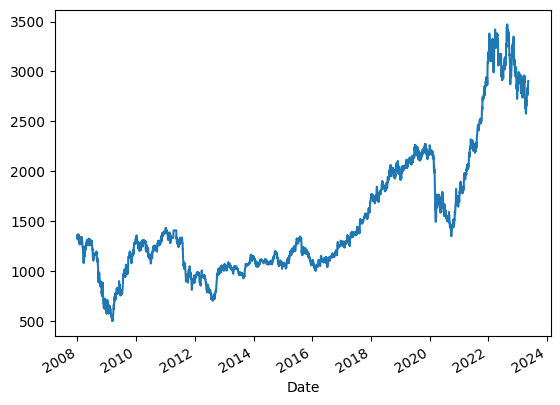

In [12]:
leumi_data["High"].plot()

# Smoothing the Big graph 

## deprecated Solution 

In [16]:
convolve_const = 70
kernel = np.ones(convolve_const)

np_convolve_leumi_data_high = np.convolve(leumi_data["High"].to_numpy(),kernel, 'same')

rescale_first = 1/convolve_const * np.ones(np_convolve_leumi_data_high.shape[0]- convolve_const)
rescale_to_end = np.array([1/n for n in range(convolve_const+35, 35, -1)])
rescale = np.append(rescale_first , rescale_to_end)
print(rescale_first.shape[0]+ rescale_to_end.shape[0])
#print(rescale)

3792


In [17]:
#np_convolve_leumi_data_high = np.convolve(leumi_data["High"].to_numpy(),kernel, 'same')
np_convolve_leumi_data_high_rescale =  np.multiply(np_convolve_leumi_data_high , rescale)
#np_convolve_leumi_data_high = np.append(np_convolve_leumi_data_high[:-convolve_const],
#                                        leumi_data["High"].to_numpy()[-convolve_const:])
# deals with the edges 
print(np_convolve_leumi_data_high_rescale.shape)
#np_convolve_leumi_data_high_rescale[-5:]
#np_convolve_leumi_data_high[-5:]

(3792,)


In [18]:
convolve_leumi_data_high = pd.DataFrame(np_convolve_leumi_data_high , index=leumi_data.index)

<Axes: xlabel='Date'>

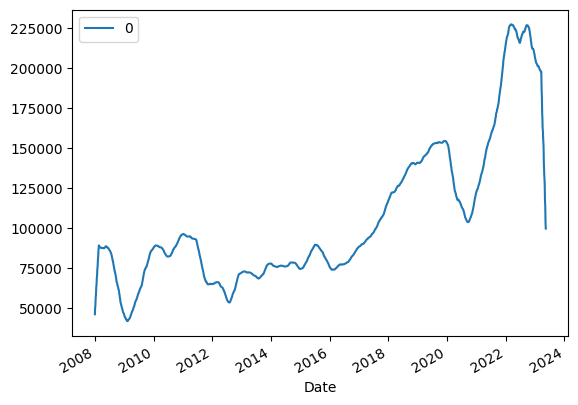

In [19]:
convolve_leumi_data_high.plot()

In [20]:
for i in range(3 ,0 , -1):
    print(i)

3
2
1


In [21]:
arr1 = np.array([1,2,3,4])
arr2 = np.array([1,2])
np.convolve(arr1,arr2 , 'same')
#np.multiply(arr1, arr2)

array([ 1,  4,  7, 10])

# De Facto Solution

Date
2022-01-02 00:00:00+02:00    3161.148903
2022-01-03 00:00:00+02:00    3164.873301
2022-01-04 00:00:00+02:00    3195.599863
2022-01-05 00:00:00+02:00    3197.462389
2022-01-06 00:00:00+02:00    3192.806815
                                ...     
2023-05-08 00:00:00+03:00    2824.983717
2023-05-09 00:00:00+03:00    2765.376417
2023-05-10 00:00:00+03:00    2824.006267
2023-05-11 00:00:00+03:00    2869.933172
2023-05-14 00:00:00+03:00    2904.133812
Name: High, Length: 333, dtype: float64


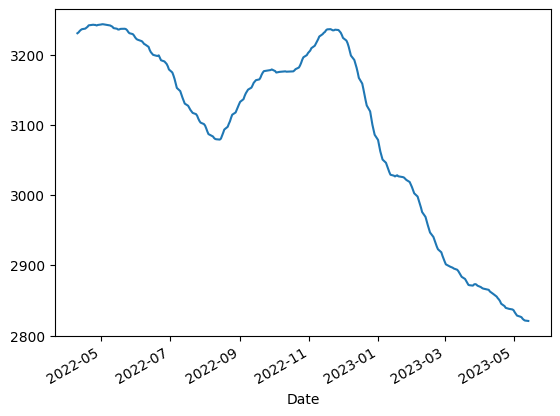

In [117]:
data = leumi_data["High"].rolling(70).mean()
data.plot()
data.shape
leumi_data["High"].shape
print(leumi_data["High"])

In [118]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt  # To visualize

linear_regressor = LinearRegression()  # create object for the class

smooth_leumi_data = leumi_data["High"].rolling(70).mean()

leumi_regression_data = pd.DataFrame(smooth_leumi_data)
leumi_regression_data.reset_index(inplace=False)
indexing = pd.RangeIndex(start=0,stop=len(leumi_regression_data) ,step=1)
leumi_regression_data["numbers"] = indexing
print(leumi_regression_data)

                                  High  numbers
Date                                           
2022-01-02 00:00:00+02:00          NaN        0
2022-01-03 00:00:00+02:00          NaN        1
2022-01-04 00:00:00+02:00          NaN        2
2022-01-05 00:00:00+02:00          NaN        3
2022-01-06 00:00:00+02:00          NaN        4
...                                ...      ...
2023-05-08 00:00:00+03:00  2826.099189      328
2023-05-09 00:00:00+03:00  2823.826380      329
2023-05-10 00:00:00+03:00  2822.418635      330
2023-05-11 00:00:00+03:00  2821.405791      331
2023-05-14 00:00:00+03:00  2820.812792      332

[333 rows x 2 columns]


In [34]:
leumi_regression_data = leumi_regression_data.dropna() #drops the NaN elements 
linear_regressor.fit(leumi_regression_data["numbers"].values.reshape(-1,1) , leumi_regression_data["High"].values.reshape(-1,1))
r2_score = linear_regressor.score(leumi_regression_data["numbers"].values.reshape(-1,1), leumi_regression_data["High"].values.reshape(-1,1))
print(f"R-squared value: {r2_score}")


R-squared value: 0.6632816236876082


<Axes: xlabel='Date'>

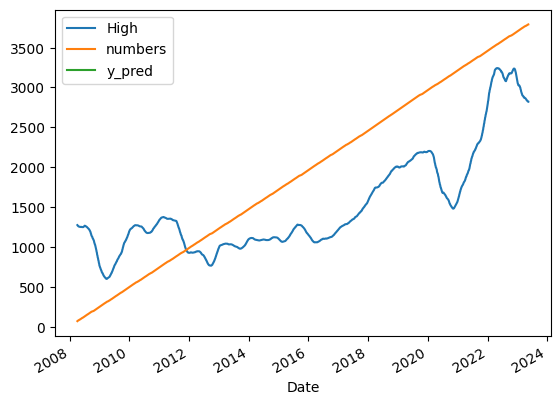

In [35]:
y_pred = pd.Series(linear_regressor.predict(leumi_regression_data["numbers"].values.reshape(-1,1)).reshape(-1))
leumi_regression_data["y_pred"] = y_pred
leumi_regression_data.plot()

In [36]:
leumi_regression_data.tail(5)
leumi_regression_data.loc[leumi_regression_data.index > "2020-10-10"]

,High,numbers,y_pred
Date,,,
2020-10-11 00:00:00+03:00,1514.665669,3155,NaN
2020-10-12 00:00:00+03:00,1513.065178,3156,NaN
2020-10-13 00:00:00+03:00,1510.677136,3157,NaN
2020-10-14 00:00:00+03:00,1508.212879,3158,NaN
2020-10-15 00:00:00+03:00,1506.218613,3159,NaN
...,...,...,...
2023-05-08 00:00:00+03:00,2826.099214,3787,NaN
2023-05-09 00:00:00+03:00,2823.826404,3788,NaN
2023-05-10 00:00:00+03:00,2822.418666,3789,NaN


In [116]:
leumi_regression_data_reversed = leumi_regression_data.iloc[-30::-1] # drops the last 30 dates for regression 
leumi_regression_data.loc["2020-10-1":] 


,High,numbers
Date,,
2022-01-02 00:00:00+02:00,NaN,0
2022-01-03 00:00:00+02:00,NaN,1
2022-01-04 00:00:00+02:00,NaN,2
2022-01-05 00:00:00+02:00,NaN,3
2022-01-06 00:00:00+02:00,NaN,4
...,...,...
2023-05-08 00:00:00+03:00,2826.099189,328
2023-05-09 00:00:00+03:00,2823.826380,329
2023-05-10 00:00:00+03:00,2822.418635,330


<Axes: xlabel='Date'>

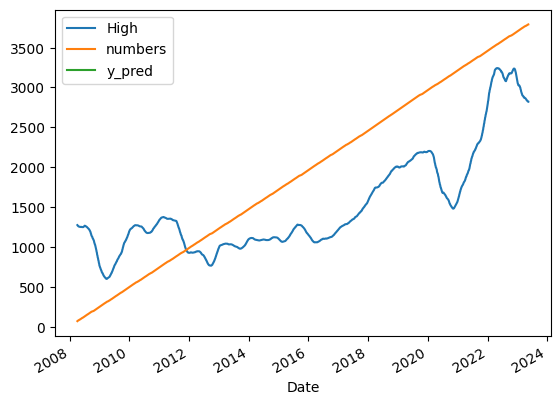

In [38]:
leumi_regression_data.plot()

                High  y_pred  pred y                      Dates        pred y
numbers                                                                      
69       1273.460205     NaN      NaN 2008-04-06 00:00:00+03:00  10400.525439
70       1271.864485     NaN      NaN 2008-04-07 00:00:00+03:00  10398.449647
71       1270.319234     NaN      NaN 2008-04-08 00:00:00+03:00  10396.373854
72       1268.730875     NaN      NaN 2008-04-09 00:00:00+03:00  10394.298062
73       1267.208075     NaN      NaN 2008-04-10 00:00:00+03:00  10392.222269
...              ...     ...      ...                       ...           ...
3787     2826.099214     NaN      NaN 2023-05-08 00:00:00+03:00           NaN
3788     2823.826404     NaN      NaN 2023-05-09 00:00:00+03:00           NaN
3789     2822.418666     NaN      NaN 2023-05-10 00:00:00+03:00           NaN
3790     2821.405819     NaN      NaN 2023-05-11 00:00:00+03:00           NaN
3791     2820.812820     NaN      NaN 2023-05-14 00:00:00+03:00 

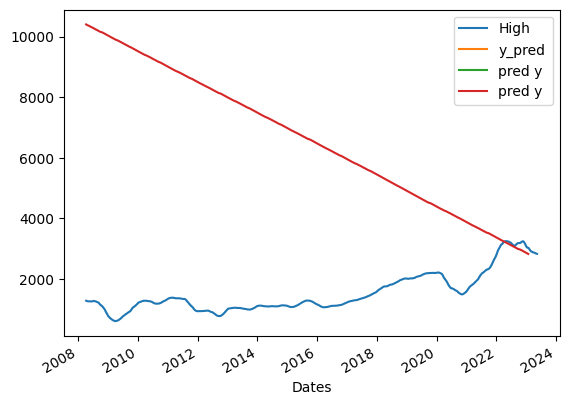

In [107]:
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error
leumi_regression_data_reversed = leumi_regression_data.iloc[-30::-1] # drops the last 30 dates for regression 
count = 0
for date in leumi_regression_data_reversed.index: #remove [:1] after tests 
    count+=1
    linear_regressor = LinearRegression()  # create object for the class
    #print("{}-{}-{}".format(date.year,date.month,date.day))
    current_date = "{}-{}-{}".format(date.year,date.month,date.day)
    current_regression = leumi_regression_data.loc[current_date:] 
    #current_regression = current_regression.dropna() #drops the NaN elements 
    #print(current_regression["High"].values.reshape(-1,1).shape)
    #print(current_regression["numbers"].values.reshape(-1,1))
    linear_regressor.fit(current_regression["numbers"].values.reshape(-1,1) , current_regression["High"].values.reshape(-1,1))
    reg = LinearRegression().fit(current_regression["numbers"].values.reshape(-1,1) , current_regression["High"].values.reshape(-1,1))
    #r2_score_data = reg.score(current_regression["numbers"].values.reshape(-1,1) , current_regression["High"].values.reshape(-1,1))
    #r2_score_data = mean_squared_error(current_regression["numbers"].values.reshape(-1,1), current_regression["High"].values.reshape(-1,1))
    r2_score_data = mean_absolute_error(current_regression["numbers"].values.reshape(-1,1), current_regression["High"].values.reshape(-1,1))
    if (r2_score_data > 100):
        temp = pd.Series(reg.predict(leumi_regression_data["numbers"].values.reshape(-1,1)).reshape(-1))
#        current_regression["y_pred1"] = temp
        #print(date)
        leumi_regression_data["Dates"] = leumi_regression_data.index
        data = leumi_regression_data.set_index("numbers")
        #leumi_regression_data.loc[:,'y_pred1']=temp
        data["pred y"]= temp
        #print(leumi_regression_data)
        #leumi_regression_data.set_index('Date')
        print(data)
        print(temp)
        data = data.set_index("Dates")
        #data.tail(500).plot()
        data.plot()
        break
    #print(f"R-squared value: {r2_score}")
print("number of iterations is:" ,count)


In [45]:
df = pd.DataFrame({"barak":[1,2,3] , "diker":[3,4,5]})
series = pd.Series([1,2,5])
df["nadav"] = series
df

,barak,diker,nadav
0,1,3,1.0
1,2,4,2.0
2,3,5,NaN


In [119]:
leumi_regression_data

,High,numbers
Date,,
2022-01-02 00:00:00+02:00,NaN,0
2022-01-03 00:00:00+02:00,NaN,1
2022-01-04 00:00:00+02:00,NaN,2
2022-01-05 00:00:00+02:00,NaN,3
2022-01-06 00:00:00+02:00,NaN,4
...,...,...
2023-05-08 00:00:00+03:00,2826.099189,328
2023-05-09 00:00:00+03:00,2823.826380,329
2023-05-10 00:00:00+03:00,2822.418635,330
